In [1]:
%tensorflow_version 2.x

In [2]:
from tensorflow.keras.datasets.cifar10 import load_data
c10 = load_data()
c10

((array([[[[ 59,  62,  63],
           [ 43,  46,  45],
           [ 50,  48,  43],
           ...,
           [158, 132, 108],
           [152, 125, 102],
           [148, 124, 103]],
  
          [[ 16,  20,  20],
           [  0,   0,   0],
           [ 18,   8,   0],
           ...,
           [123,  88,  55],
           [119,  83,  50],
           [122,  87,  57]],
  
          [[ 25,  24,  21],
           [ 16,   7,   0],
           [ 49,  27,   8],
           ...,
           [118,  84,  50],
           [120,  84,  50],
           [109,  73,  42]],
  
          ...,
  
          [[208, 170,  96],
           [201, 153,  34],
           [198, 161,  26],
           ...,
           [160, 133,  70],
           [ 56,  31,   7],
           [ 53,  34,  20]],
  
          [[180, 139,  96],
           [173, 123,  42],
           [186, 144,  30],
           ...,
           [184, 148,  94],
           [ 97,  62,  34],
           [ 83,  53,  34]],
  
          [[177, 144, 116],
           [16

In [3]:
(x_train, y_train), (x_test, y_test) = load_data()
y_train

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

In [4]:
# 一定要看的資料有幾筆
print(x_train.shape) # 共有 50000 張圖, 每張 32 x 32 3通道
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(50000, 32, 32, 3)
(50000, 1)
(10000, 32, 32, 3)
(10000, 1)


0 : airplain (飛機)
1 : automobile (汽車)
2 : bird (鳥)
3 : cat (貓)
4 : deer (鹿)
5 : dog (狗)
6 : frog (青蛙)
7 : horse (馬)
8 : ship (船)
9 : truck (卡車)

In [5]:
classname = ["airplain", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]

這張是第: 6 類 frog


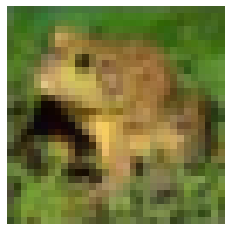

In [6]:
# 一定要做的 看一下圖片情況
import random 
import matplotlib.pyplot as plt 
p = random.randint(0, 49999)
n = int(y_train[p])
plt.axis("off")
print("這張是第:",n, "類", classname[n])
plt.imshow(x_train[p])

In [7]:
from tensorflow.keras.applications.resnet import preprocess_input
x_train_norm = preprocess_input(x_train)
x_test_norm = preprocess_input(x_test)

In [8]:
from tensorflow.keras.applications import ResNet101V2
cnn = ResNet101V2(include_top=False, weights="imagenet", input_shape=(32, 32, 3))
cnn.summary()

171319296/171317808 [==============================] - 5s 0us/step
Model: "resnet101v2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 32, 32, 3)]  0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 38, 38, 3)    0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 16, 16, 64)   9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
pool1_pad (ZeroPadding2D)       (None, 18, 18, 64)   0           conv1_conv[0][0]                 
_____________________

In [9]:
cnn.layers

In [10]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Flatten, Dropout, BatchNormalization
for i in cnn.layers:
  i.trainable = False
x = BatchNormalization()(cnn.output)
x = Flatten()(x)
x = Dense(512, activation="relu")(x)
x = Dropout(0.3)(x)
x = Dense(64, activation="relu")(x)
out = Dense(10, activation="softmax")(x)
model = Model(inputs=cnn.input, outputs=out)
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 32, 32, 3)]  0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 38, 38, 3)    0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 16, 16, 64)   9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
pool1_pad (ZeroPadding2D)       (None, 18, 18, 64)   0           conv1_conv[0][0]                 
______________________________________________________________________________________________

In [11]:
from tensorflow.keras.losses import SparseCategoricalCrossentropy
model.compile(loss=SparseCategoricalCrossentropy(),
              optimizer="adam",
              metrics=["accuracy"])

In [12]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
callback = [EarlyStopping(patience=3, restore_best_weights=True),
            ModelCheckpoint("Cifar10_VGG16.h5", save_best_only=True)]
history = model.fit(x_train_norm, y_train,
          batch_size=300, epochs=20,
          validation_split=0.1, callbacks=callback)

Epoch 1/20
150/150 [==============================] - 21s 142ms/step - loss: 1.9454 - accuracy: 0.2968 - val_loss: 1.8321 - val_accuracy: 0.3488
Epoch 2/20
150/150 [==============================] - 18s 120ms/step - loss: 1.7531 - accuracy: 0.3672 - val_loss: 1.7118 - val_accuracy: 0.3836
Epoch 3/20
150/150 [==============================] - 18s 120ms/step - loss: 1.6773 - accuracy: 0.3947 - val_loss: 1.6930 - val_accuracy: 0.3988
Epoch 4/20
150/150 [==============================] - 17s 111ms/step - loss: 1.6264 - accuracy: 0.4136 - val_loss: 1.7042 - val_accuracy: 0.3990
Epoch 5/20
150/150 [==============================] - 17s 111ms/step - loss: 1.5814 - accuracy: 0.4331 - val_loss: 1.7030 - val_accuracy: 0.4066
Epoch 6/20
150/150 [==============================] - 18s 120ms/step - loss: 1.5403 - accuracy: 0.4465 - val_loss: 1.6877 - val_accuracy: 0.4062
Epoch 7/20
150/150 [==============================] - 17s 111ms/step - loss: 1.5068 - accuracy: 0.4584 - val_loss: 1.7045 - val_ac

In [13]:
model.evaluate(x_test_norm, y_test)

313/313 [==============================] - 13s 42ms/step - loss: 1.7120 - accuracy: 0.4070


[1.7120146751403809, 0.40700000524520874]

In [14]:
pre = model.predict(x_test_norm, batch_size=300, verbose=1)

34/34 [==============================] - 4s 119ms/step


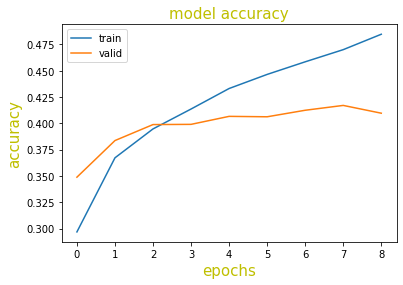

In [15]:
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.title("model accuracy", fontsize=15, color="y")
plt.xlabel("epochs", fontsize=15, color="y")
plt.ylabel("accuracy", fontsize=15, color="y")
plt.legend(["train", "valid"], loc="best")

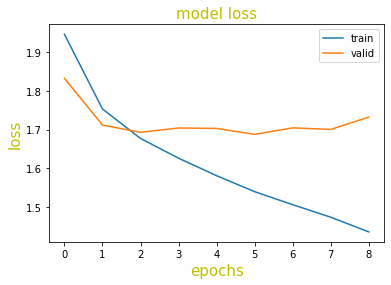

In [16]:
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.title("model loss", fontsize=15, color="y")
plt.xlabel("epochs", fontsize=15, color="y")
plt.ylabel("loss", fontsize=15, color="y")
plt.legend(["train", "valid"], loc="best")